In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
#reading the file
with open("/kaggle/input/aml-end-term-datasets/SMSSpamCollection" ,"r") as email:
    content = email.read()

In [47]:
#since its sepretad by tab, we split data by "\t"
import pandas as pd
import numpy as np
emails = pd.DataFrame(content.splitlines(),columns=["body"])
emails[["label","content"]]=emails["body"].str.split("\t",expand=True)

In [48]:
#we seperated labels and content from the raw emails
emails

,body,label,content
0,"ham\tGo until jurong point, crazy.. Available ...",ham,"Go until jurong point, crazy.. Available only ..."
1,ham\tOk lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham\tU dun say so early hor... U c already the...,ham,U dun say so early hor... U c already then say...
4,"ham\tNah I don't think he goes to usf, he live...",ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5569,spam\tThis is the 2nd time we have tried 2 con...,spam,This is the 2nd time we have tried 2 contact u...
5570,ham\tWill ü b going to esplanade fr home?,ham,Will ü b going to esplanade fr home?
5571,"ham\tPity, * was in mood for that. So...any ot...",ham,"Pity, * was in mood for that. So...any other s..."
5572,ham\tThe guy did some bitching but I acted lik...,ham,The guy did some bitching but I acted like i'd...


In [49]:
#encoding "ham" as  and "spam" as 1
emails["y"] = emails["label"].apply(lambda x: 0 if x == "ham" else 1)

In [50]:
emails.head()

,body,label,content,y
0,"ham\tGo until jurong point, crazy.. Available ...",ham,"Go until jurong point, crazy.. Available only ...",0
1,ham\tOk lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...,0
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham\tU dun say so early hor... U c already the...,ham,U dun say so early hor... U c already then say...,0
4,"ham\tNah I don't think he goes to usf, he live...",ham,"Nah I don't think he goes to usf, he lives aro...",0


## Text Pre-Processing

### Lower case

* Since, words may be in upper or lower, it has the same meaning , we should make it all lower case or upper case, since it may double counted word by the model.

In [51]:
emails.content = emails.content.apply(lambda x : x.lower())
emails.head()

,body,label,content,y
0,"ham\tGo until jurong point, crazy.. Available ...",ham,"go until jurong point, crazy.. available only ...",0
1,ham\tOk lar... Joking wif u oni...,ham,ok lar... joking wif u oni...,0
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham\tU dun say so early hor... U c already the...,ham,u dun say so early hor... u c already then say...,0
4,"ham\tNah I don't think he goes to usf, he live...",ham,"nah i don't think he goes to usf, he lives aro...",0


### Stopwords

* Stopwords are words which is common, in sentences like "is", "was" ,removing those words, would make our model less complex.

In [52]:
from nltk.corpus import stopwords
#contains all stopwords
stop_words = stopwords.words("english")

In [53]:
#removing stopwords
emails.content = emails.content.apply(lambda x : " ".join([w for w in x.split() if w not in stop_words]))
emails.head()

,body,label,content,y
0,"ham\tGo until jurong point, crazy.. Available ...",ham,"go jurong point, crazy.. available bugis n gre...",0
1,ham\tOk lar... Joking wif u oni...,ham,ok lar... joking wif u oni...,0
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham\tU dun say so early hor... U c already the...,ham,u dun say early hor... u c already say...,0
4,"ham\tNah I don't think he goes to usf, he live...",ham,"nah think goes usf, lives around though",0


### Punctuation

* If we are doing context based modelling, punctuation , conjunctions, will make huge sence, since it convey different meaning, in different sentences, since we are not doing context based embedding, we can remove the punctuations.

In [54]:
import string
p = string.punctuation
remv_punc = str.maketrans("","",p)

In [55]:
#removing punctuation
emails.content = emails.content.apply(lambda x: x.translate(remv_punc))
emails.head()

,body,label,content,y
0,"ham\tGo until jurong point, crazy.. Available ...",ham,go jurong point crazy available bugis n great ...,0
1,ham\tOk lar... Joking wif u oni...,ham,ok lar joking wif u oni,0
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham\tU dun say so early hor... U c already the...,ham,u dun say early hor u c already say,0
4,"ham\tNah I don't think he goes to usf, he live...",ham,nah think goes usf lives around though,0


### White spaces

* Its for just formatting correctly the sentences.

In [56]:
#removing white spaces
emails.content = emails.content.apply(lambda x: x.replace("  "," ").strip())
emails.head()

,body,label,content,y
0,"ham\tGo until jurong point, crazy.. Available ...",ham,go jurong point crazy available bugis n great ...,0
1,ham\tOk lar... Joking wif u oni...,ham,ok lar joking wif u oni,0
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham\tU dun say so early hor... U c already the...,ham,u dun say early hor u c already say,0
4,"ham\tNah I don't think he goes to usf, he live...",ham,nah think goes usf lives around though,0


## Removing numbers

* There are numbers like door no, vehicle no. , date no., which are quite often changing and cant be useful in our model, but information that the mail contains address , mobile no. or not gives some information about the data, and can be used for modelling.

In [57]:
import re
numbers = r'[0-9]'

In [58]:
#removing numbers
emails.content = emails.content.apply(lambda x : re.sub(numbers,'',x))
emails.head()

,body,label,content,y
0,"ham\tGo until jurong point, crazy.. Available ...",ham,go jurong point crazy available bugis n great ...,0
1,ham\tOk lar... Joking wif u oni...,ham,ok lar joking wif u oni,0
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,free entry wkly comp win fa cup final tkts st...,1
3,ham\tU dun say so early hor... U c already the...,ham,u dun say early hor u c already say,0
4,"ham\tNah I don't think he goes to usf, he live...",ham,nah think goes usf lives around though,0


### Stemming

* Words which are written in present, past and future sentence are looked same . So , we could convert those words to a common word using Stemming.

In [65]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [66]:
#stemming the data
emails["Stemmed_content"] = emails.content.apply(lambda x : " ".join([ps.stem(w) for w in x.split()]))
emails.head()

,body,label,content,y,mobile_no_present,Stemmed_content
0,"ham\tGo until jurong point, crazy.. Available ...",ham,go jurong point crazy available bugis n great ...,0,0,go jurong point crazi avail bugi n great world...
1,ham\tOk lar... Joking wif u oni...,ham,ok lar joking wif u oni,0,0,ok lar joke wif u oni
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,free entry wkly comp win fa cup final tkts st...,1,1,free entri wkli comp win fa cup final tkt st m...
3,ham\tU dun say so early hor... U c already the...,ham,u dun say early hor u c already say,0,0,u dun say earli hor u c alreadi say
4,"ham\tNah I don't think he goes to usf, he live...",ham,nah think goes usf lives around though,0,0,nah think goe usf live around though


### Lemmatization

In [294]:
from nltk.stem import WordNetLemmatizer

In [295]:
lemmatizer = WordNetLemmatizer()
emails["Lemmatized_content"] = emails.content.apply(lambda x : " ".join([lemmatizer.lemmatize(w) for w in x.split()]))
emails.head()

,body,label,content,y,mobile_no_present,Stemmed_content,Tokenized_content,html_present,DocVecs,DocVecsAvg,Zero_Doc2Vec,Lemmatized_content
0,"ham\tGo until jurong point, crazy.. Available ...",ham,go jurong point crazy available bugis n great ...,0,0,go jurong point crazi avail bugi n great world...,"[go, jurong, point, crazy, available, bugis, n...",0,"[-0.27728271484375, 0.723388671875, 0.37939453...","[-0.017330169677734375, 0.0452117919921875, 0....",0,go jurong point crazy available bugis n great ...
1,ham\tOk lar... Joking wif u oni...,ham,ok lar joking wif u oni,0,0,ok lar joke wif u oni,"[ok, lar, joking, wif, u, oni]",0,"[-0.3794097900390625, 0.4822998046875, 0.36566...","[-0.06323496500651042, 0.08038330078125, 0.060...",0,ok lar joking wif u oni
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,free entry wkly comp win fa cup final tkts st...,1,1,free entri wkli comp win fa cup final tkt st m...,"[free, entry, wkly, comp, win, fa, cup, final,...",0,"[-0.39772796630859375, -0.1070556640625, -1.52...","[-0.01988639831542969, -0.005352783203125, -0....",0,free entry wkly comp win fa cup final tkts st ...
3,ham\tU dun say so early hor... U c already the...,ham,u dun say early hor u c already say,0,0,u dun say earli hor u c alreadi say,"[u, dun, say, early, hor, u, c, already, say]",0,"[-0.59112548828125, 0.235931396484375, 0.97338...","[-0.06568060980902778, 0.026214599609375, 0.10...",0,u dun say early hor u c already say
4,"ham\tNah I don't think he goes to usf, he live...",ham,nah think goes usf lives around though,0,0,nah think goe usf live around though,"[nah, think, goes, usf, lives, around, though]",0,"[0.227294921875, 0.262237548828125, 0.33142089...","[0.032470703125, 0.03746250697544643, 0.047345...",0,nah think go usf life around though


### Tokenizing

In [296]:
from nltk import word_tokenize

In [297]:
#we are just splitting the words into a list
emails["Tokenized_content"] = emails.content.apply(lambda x : word_tokenize(x))
emails.head()

,body,label,content,y,mobile_no_present,Stemmed_content,Tokenized_content,html_present,DocVecs,DocVecsAvg,Zero_Doc2Vec,Lemmatized_content
0,"ham\tGo until jurong point, crazy.. Available ...",ham,go jurong point crazy available bugis n great ...,0,0,go jurong point crazi avail bugi n great world...,"[go, jurong, point, crazy, available, bugis, n...",0,"[-0.27728271484375, 0.723388671875, 0.37939453...","[-0.017330169677734375, 0.0452117919921875, 0....",0,go jurong point crazy available bugis n great ...
1,ham\tOk lar... Joking wif u oni...,ham,ok lar joking wif u oni,0,0,ok lar joke wif u oni,"[ok, lar, joking, wif, u, oni]",0,"[-0.3794097900390625, 0.4822998046875, 0.36566...","[-0.06323496500651042, 0.08038330078125, 0.060...",0,ok lar joking wif u oni
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,free entry wkly comp win fa cup final tkts st...,1,1,free entri wkli comp win fa cup final tkt st m...,"[free, entry, wkly, comp, win, fa, cup, final,...",0,"[-0.39772796630859375, -0.1070556640625, -1.52...","[-0.01988639831542969, -0.005352783203125, -0....",0,free entry wkly comp win fa cup final tkts st ...
3,ham\tU dun say so early hor... U c already the...,ham,u dun say early hor u c already say,0,0,u dun say earli hor u c alreadi say,"[u, dun, say, early, hor, u, c, already, say]",0,"[-0.59112548828125, 0.235931396484375, 0.97338...","[-0.06568060980902778, 0.026214599609375, 0.10...",0,u dun say early hor u c already say
4,"ham\tNah I don't think he goes to usf, he live...",ham,nah think goes usf lives around though,0,0,nah think goe usf live around though,"[nah, think, goes, usf, lives, around, though]",0,"[0.227294921875, 0.262237548828125, 0.33142089...","[0.032470703125, 0.03746250697544643, 0.047345...",0,nah think go usf life around though


## Data Exploration:

In [80]:
ham = ""
spam = ""
for i in range(len(emails)):
    if emails.label[i] == "ham":
        ham = ham + emails.body[i][4:]
    else :
        spam = spam + emails.body[i][5:]

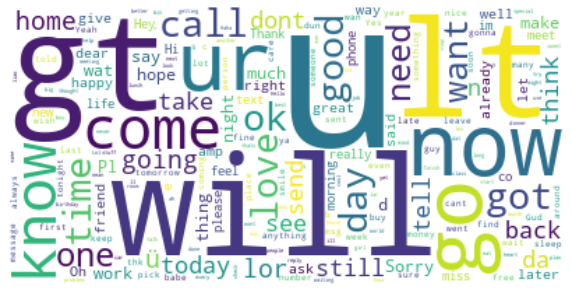

In [81]:
#note that this is performed on raw data without any text pre-processing
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#Wordcloud for ham
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* We see here in this that , words like "gt","u","ur","lt","will","go","now","love","know","time","come" and even "call" are appearing more in the data.
* Here we see the frequency of "call" is high in both the case but very high in spam case.
* We could use this information for making new features for modelling.

In [269]:
Ham_most_frequent = ["gt","u","ur","it","will","go","now","love","know","time","come"]

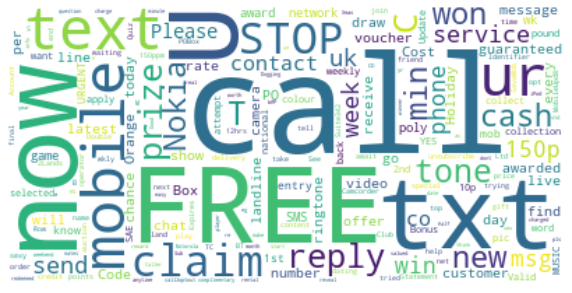

In [83]:
#note that this is performed on raw data without any text pre-processing
#Wordcloud for spam
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* While seeing here most of the spam mails contains, words like "now","call","stop","FREE","txt","mobile","prize","claim","reply","cash","contact" ,"won"and "txt" are some of few most frequent words.
* Same as for ham , we use these words to create new features to our model.

In [268]:
Spam_most_frequent = ["now","call","stop","free","txt","mobile","prize","claim","reply","cash","contact","won"]

## Vectorization

### a) Vectorizing using TF

In [298]:
from sklearn.feature_extraction.text import CountVectorizer

In [305]:
cv = CountVectorizer()
X_Bow_Model = cv.fit_transform(emails.Lemmatized_content).toarray()
X_Bow_Model

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [319]:
names = cv.get_feature_names_out()
tf_vectors_1 = pd.DataFrame(X_Bow_Model,columns=names)

In [321]:
tf_vectors_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Columns: 8036 entries, aa to 〨ud
dtypes: int64(8036)
memory usage: 341.7 MB


In [322]:
tf_vectors_1.head()

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [324]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors_1 = tfidf_vectorizer.fit_transform(emails.Lemmatized_content)

names = tfidf_vectorizer.get_feature_names_out()

tfidf_vectors_1 = tfidf_vectors_1.toarray()
tfidf_vectors_1 = pd.DataFrame(tfidf_vectors_1, columns= names)

In [326]:
tfidf_vectors_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Columns: 8036 entries, aa to 〨ud
dtypes: float64(8036)
memory usage: 341.7 MB


In [327]:
tfidf_vectors_1.head()

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Word-to-vec-model

In [ ]:
from gensim.models import KeyedVectors
embeddings = KeyedVectors.load_word2vec_format('/kaggle/input/aml-end-term-datasets/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary = True)

In [92]:
wordslist = []
for sentence in emails.Tokenized_content:
    for word in sentence:
        wordslist.append(word)
len(wordslist)

52081

In [93]:
wordslist = list(set(wordslist))
len(wordslist)

8657

In [ ]:
# I stored this value 
word_embeddings = {}
for word in embeddings.index_to_key:
    if word in wordslist:
        word_embeddings[word] = embeddings[word]


In [117]:
DocVecs = []
count = 0
for sentence in emails.Tokenized_content:
    doc_vec_for_each_sent = np.zeros(300)
    for words in sentence:
        if words in word_embeddings.keys():
            doc_vec_for_each_sent = np.add(doc_vec_for_each_sent,
                                          word_embeddings[words])
    if np.count_nonzero(doc_vec_for_each_sent) != 0:
        #doc_vec_for_each_sent = np.divide(doc_vec_for_each_sent,len(sentence))
        DocVecs.append(doc_vec_for_each_sent)
    else :
        DocVecs.append(doc_vec_for_each_sent)
        count += 1
print("The no of zero vectors are:",count)

The no of zero vectors are: 18


In [118]:
emails["DocVecs"] = DocVecs

In [96]:
len(emails)

5574

In [116]:
DocVecs2 = []
count = 0
for sentence in emails.Tokenized_content:
    doc_vec_for_each_sent = np.zeros(300)
    for words in sentence:
        if words in word_embeddings.keys():
            doc_vec_for_each_sent = np.add(doc_vec_for_each_sent,
                                          word_embeddings[words])
    if np.count_nonzero(doc_vec_for_each_sent) != 0:
        doc_vec_for_each_sent = np.divide(doc_vec_for_each_sent,len(sentence))
        DocVecs2.append(doc_vec_for_each_sent)
    else :
        DocVecs2.append(doc_vec_for_each_sent)
        count += 1
print("The no of zero vectors are:",count)

The no of zero vectors are: 18


In [119]:
emails["DocVecsAvg"] = DocVecs2

In [314]:
emails.columns

Index(['body', 'label', 'content', 'y', 'mobile_no_present', 'Stemmed_content',
       'Tokenized_content', 'html_present', 'DocVecs', 'DocVecsAvg',
       'Zero_Doc2Vec', 'Lemmatized_content'],
      dtype='object')

### Heuristic Features

* We can create feature like 
    1. Does mobile no exist
    2. Does link is provided in the text ("http")
    3. Creation of features that contains, more frequent words.

In [273]:
HF_vec = pd.DataFrame(index=emails.index)
import re
Phonenumber = re.compile(r"\d\d\d\d\d\d\d\d\d\d\d")

In [276]:
HF_vec["URL"] =emails.body.apply(lambda x: 1 if "http" in x else 0)

In [275]:
HF_vec["mobile_no"] = emails.body.apply(lambda x : 1 if Phonenumber.search(x) != None else 0)

In [278]:
for i in Spam_most_frequent:
    HF_vec[i] = emails.body.apply(lambda x: 1 if i in x else 0)

In [279]:
for i in Ham_most_frequent:
    HF_vec[i] = emails.body.apply(lambda x: 1 if i in x else 0)

In [282]:
HF_vec

,URL,mobile_no,now,call,stop,free,txt,mobile,prize,claim,...,gt,u,ur,it,will,go,love,know,time,come
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5572,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [281]:
HF_vec.sum()

URL            21
mobile_no     401
now           634
call          471
stop           93
free          122
txt           116
mobile        117
prize          72
claim          78
reply          95
cash           64
contact        74
won           140
gt            288
u            4366
ur           1392
it           1545
will          316
go            905
love          167
know          252
time          246
come          246
dtype: int64

## Dimesnion Reduction

### a) PCA

#### TF-Vector

In [337]:
pca_vectors = PCA(n_components=2000)
principalComponents = pca_vectors.fit_transform(tf_vectors_1)
principalComp = pd.DataFrame(data = principalComponents,
                          index = tf_vectors_1.index)

In [338]:
sum = 0
for i in pca_vectors.explained_variance_ratio_:
    sum = sum + i
sum

0.9504869536381231

* With 2000 components, it explains 95% of variance.

In [ ]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 8)) # Create custom size image

   
ax.scatter(principalComp[0], principalComp[1],c = emails.y); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Visualization of TF-Vector")

# Add the word label over each dot in the scatter plot
# for i in principal_tf.index:
#     ax.annotate(i, (principal_tf.loc[i, 0], principal_tf.loc[i, 1]))
    
    
# Print an arrow for each word
# for i in principal_tf.index:
#     ax.arrow(0, 0, principal_tf.loc[i, 0], principal_tf.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

#### TF-IDF 

In [352]:
pca_vectors = PCA(n_components=2800)
principalComponents = pca_vectors.fit_transform(tfidf_vectors_1)
principalComp = pd.DataFrame(data = principalComponents,
                          index = tfidf_vectors_1.index)

In [353]:
sum = 0
for i in pca_vectors.explained_variance_ratio_:
    sum = sum + i
sum

0.9534706504810444

* With 2800 components, it explains 95% of variance.

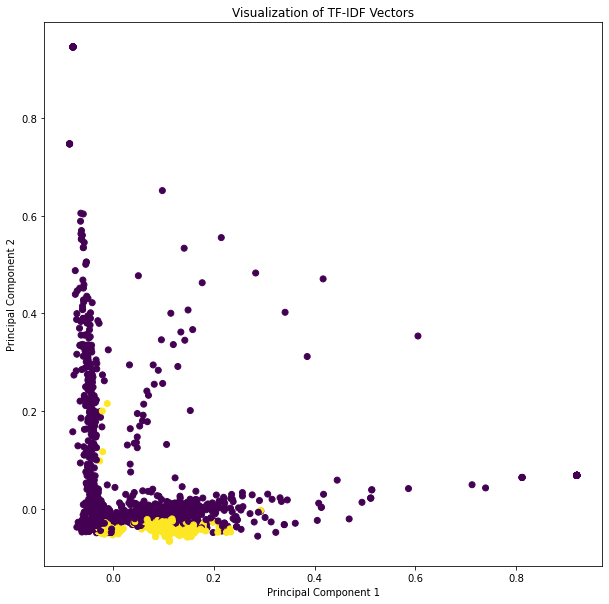

In [355]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

   
ax.scatter(principalComp[0], principalComp[1],c = emails.y); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Visualization of TF-IDF Vectors")

# Add the word label over each dot in the scatter plot
# for i in principal_tf.index:
#     ax.annotate(i, (principal_tf.loc[i, 0], principal_tf.loc[i, 1]))
    
    
# Print an arrow for each word
# for i in principal_tf.index:
#     ax.arrow(0, 0, principal_tf.loc[i, 0], principal_tf.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

#### Doc-to-vec

In [135]:
emails["Zero_Doc2Vec"] = emails.DocVecs.apply(lambda x : 1 if np.count_nonzero(x)==0 else 0)

In [171]:
X = pd.DataFrame(emails.DocVecs[emails.Zero_Doc2Vec == 0].to_list())
X

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.277283,0.723389,0.379395,3.061523,-0.434479,0.545715,1.147522,-1.344482,0.200500,1.083086,...,0.024780,0.594177,-1.650635,1.291077,0.080200,-0.458130,0.387207,-1.118958,-0.733032,0.424713
1,-0.379410,0.482300,0.365662,0.614990,-0.473145,0.211426,-0.318237,-0.440613,0.060303,0.483765,...,0.469452,0.634033,-0.806580,-0.247925,-1.007812,-0.972656,-0.836426,-0.685150,-0.437256,0.655273
2,-0.397728,-0.107056,-1.522949,1.201904,1.417044,0.652939,-0.388916,-1.581512,1.140869,2.141052,...,0.370117,0.158936,0.058899,-0.473145,0.466919,-0.328369,-0.326752,-1.567123,-1.318108,0.135563
3,-0.591125,0.235931,0.973389,0.782776,-1.006348,0.004631,-0.400513,-0.938232,-0.049805,1.060059,...,0.298096,0.553711,-0.416077,-0.128418,-0.598145,-1.251221,-0.859444,-0.646484,-0.136230,0.998901
4,0.227295,0.262238,0.331421,1.100708,-0.135620,0.214600,0.556763,-0.564735,0.602966,0.654297,...,-0.106995,0.386719,-0.948730,0.609253,-0.687057,0.167725,0.120850,-0.564728,0.590633,0.138306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,0.036987,0.493277,0.377914,1.312134,-0.221008,0.135437,0.780365,-1.149292,0.463379,0.631104,...,-0.387207,0.391602,-1.854889,-0.164856,-0.553345,-1.209900,-0.739502,-0.788162,0.155762,-0.061279
5552,0.082275,0.609375,0.881897,0.534882,-0.372559,-0.103668,-0.495239,-0.853235,-0.050903,0.235474,...,-0.602295,0.625732,-0.785538,0.454285,-0.070435,-0.453125,-0.501099,-0.663574,-0.010742,0.536987
5553,0.117065,0.444824,0.129395,0.318848,-0.536377,0.019287,0.147400,-0.442871,0.287109,0.408691,...,-0.761292,0.238464,0.072510,-0.403259,0.041748,0.255859,0.490570,-0.102020,-0.000244,-0.126587
5554,1.590454,0.231445,-0.198627,1.231384,-1.188628,0.458557,0.718811,-0.976105,-0.171570,1.298584,...,-0.528332,1.200409,-1.436089,0.748474,-0.362335,-0.055298,0.606720,-1.017822,-0.400887,-0.591255


In [195]:
pca_doc2vec = PCA(n_components=190)
principalComponents_word2vec = pca_doc2vec.fit_transform(X)
principal_word2vec = pd.DataFrame(data = principalComponents_word2vec,
                          index = X.index)

In [197]:
sum = 0
for i in pca_doc2vec.explained_variance_ratio_:
    sum = sum + i
sum

0.9509551554693855

* Thus with 190 components, it attains the ovrall of variance of 95%

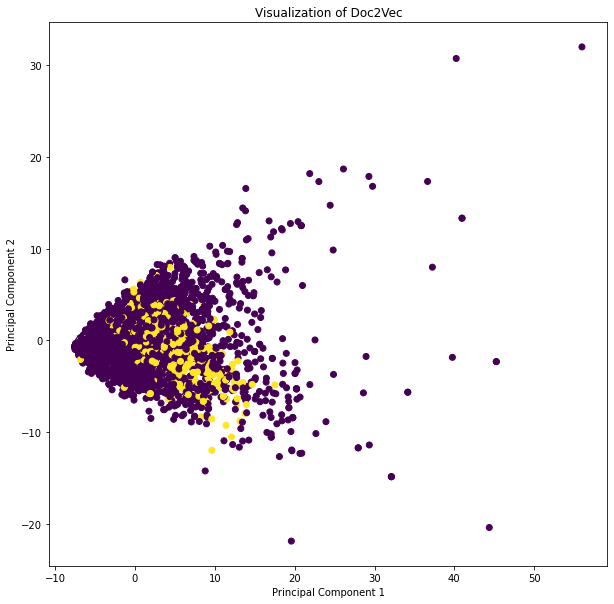

In [370]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

   
ax.scatter(principal_word2vec[0], principal_word2vec[1],c = emails.y[emails.Zero_Doc2Vec == 0]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Visualization of Doc2Vec")

# Add the word label over each dot in the scatter plot
# for i in principal_tf.index:
#     ax.annotate(i, (principal_tf.loc[i, 0], principal_tf.loc[i, 1]))
    
    
# Print an arrow for each word
# for i in principal_tf.index:
#     ax.arrow(0, 0, principal_tf.loc[i, 0], principal_tf.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

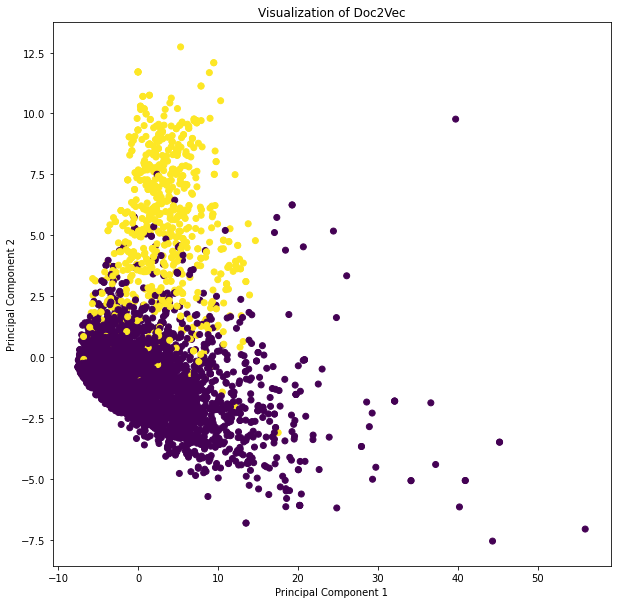

In [369]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

   
ax.scatter(principal_word2vec[0], principal_word2vec[2],c = emails.y[emails.Zero_Doc2Vec == 0]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Visualization of Doc2Vec")


# Add the word label over each dot in the scatter plot
# for i in principal_tf.index:
#     ax.annotate(i, (principal_tf.loc[i, 0], principal_tf.loc[i, 1]))
    
    
# Print an arrow for each word
# for i in principal_tf.index:
#     ax.arrow(0, 0, principal_tf.loc[i, 0], principal_tf.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

#### HF - Vector

In [365]:
pca_vectors = PCA(n_components=18)
principalComponents = pca_vectors.fit_transform(HF_vec)
principalComp = pd.DataFrame(data = principalComponents,
                          index = HF_vec.index)

In [366]:
sum = 0
for i in pca_vectors.explained_variance_ratio_:
    sum = sum + i
sum

0.9569327566163932

* With 18 components, it explains 95% of variance.

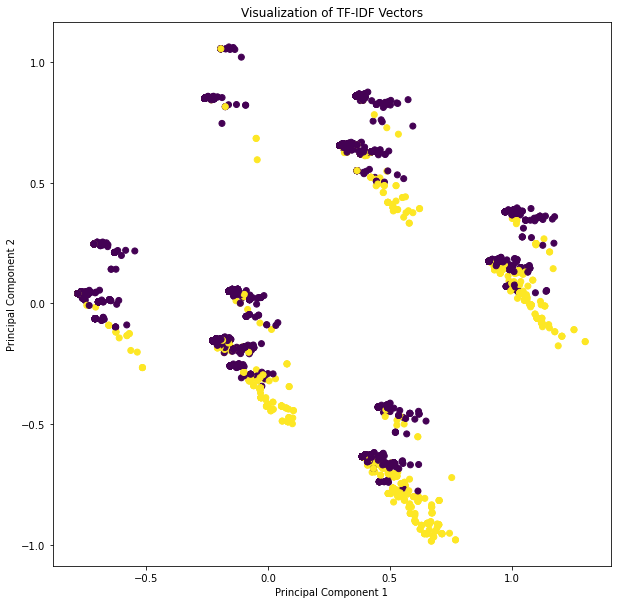

In [367]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

   
ax.scatter(principalComp[0], principalComp[1],c = emails.y); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Visualization of HF-IDF Vectors")

# Add the word label over each dot in the scatter plot
# for i in principal_tf.index:
#     ax.annotate(i, (principal_tf.loc[i, 0], principal_tf.loc[i, 1]))
    
    
# Print an arrow for each word
# for i in principal_tf.index:
#     ax.arrow(0, 0, principal_tf.loc[i, 0], principal_tf.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

### c) Heuristic approaches to PCA

In [315]:
# tf_vectors = tf_vectors_1

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Since, less ferquent words wont generalize the model for unseen data, we can delete words which are less frequent.

In [316]:
Dropped_words = []
for col in list(tf_vectors):
    prop = (tf_vectors[col].sum())/tf_vectors.shape[0]
    if prop*100 < 1:
        Dropped_words.append(col)
        tf_vectors = tf_vectors.drop([col],axis = 1)

In [371]:
print("we dropped around",len(Dropped_words),"columns from tf_vectors")

we dropped around 7889 columns from tf_vectors


In [318]:
tf_vectors

,already,also,always,amp,anything,around,ask,babe,back,buy,...,win,wish,word,work,would,ya,yeah,year,yes,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [385]:
pca_tf = PCA(n_components=126)
principalComponents_tf = pca_tf.fit_transform(tf_vectors)
principal_tf = pd.DataFrame(data = principalComponents_tf,
                          index = tf_vectors.index)

In [386]:
sum = 0
for i in pca_tf.explained_variance_ratio_:
    sum = sum + i
sum

0.9514404721088554

* By pca after heuristic reduction of dimension ,with 126 features, we get a 95% variance

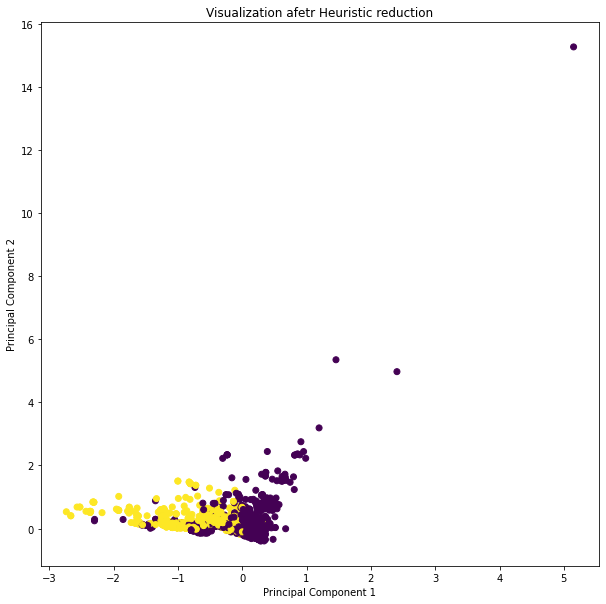

In [387]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

   
ax.scatter(principal_tf[0], principal_tf[1],c = emails.y); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Visualization afetr Heuristic reduction")


#Add the word label over each dot in the scatter plot
# for i in principal_tf.index:
#     ax.annotate(i, (principal_tf.loc[i, 0], principal_tf.loc[i, 1]))
    
    
# #Print an arrow for each word
# for i in principal_tf.index:
#     ax.arrow(0, 0, principal_tf.loc[i, 0], principal_tf.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

* Same thing can be applied to TF-IDF vectors too.

In [392]:
tfidf_vectors2 = tfidf_vectors[tf_vectors.columns]

In [399]:
pca_tf = PCA(n_components=127)
principalComponents_tf = pca_tf.fit_transform(tfidf_vectors2)
principal_tf = pd.DataFrame(data = principalComponents_tf,
                          index = tf_vectors.index)

In [400]:
sum = 0
for i in pca_tf.explained_variance_ratio_:
    sum = sum + i
sum

0.9514787436641735

* With 127 components , we can explain 95 % of variance.

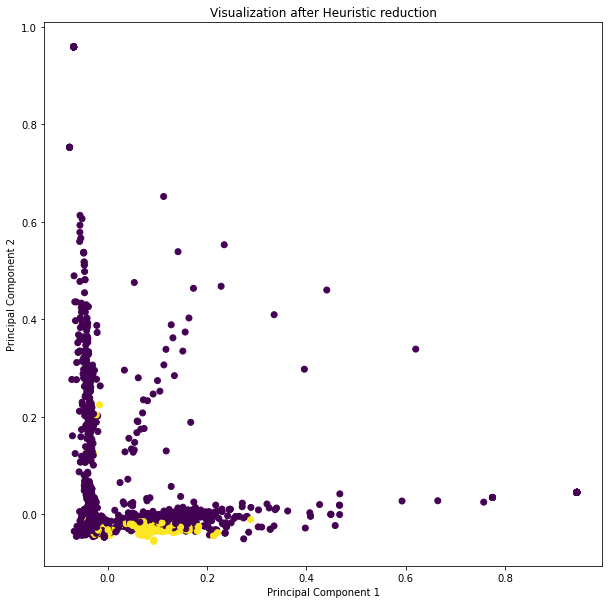

In [401]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

   
ax.scatter(principal_tf[0], principal_tf[1],c = emails.y); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Visualization after Heuristic reduction")


#Add the word label over each dot in the scatter plot
# for i in principal_tf.index:
#     ax.annotate(i, (principal_tf.loc[i, 0], principal_tf.loc[i, 1]))
    
    
# #Print an arrow for each word
# for i in principal_tf.index:
#     ax.arrow(0, 0, principal_tf.loc[i, 0], principal_tf.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

## Spam Filters

In [ ]:
def ModelFitting(model,X_train,y_train,X_valid,y_valid):
    mdl = model.fit(X_train,y_train)
    predicted = mdl.predict(X_valid)
    print("The confusion matrix is given by:")
    print(metrics.confusion_matrix(y_valid,predicted))
    print("Accuracy :",metrics.accuracy_score(y_valid,predicted))
    print("Precision :",metrics.precision_score(y_valid,predicted))
    print("Recall :",metrics.recall_score(y_valid,predicted))
    print("F1_score :",metrics.f1_score(y_valid,predicted))

#### Train_test_validation split

In [ ]:
from sklearn.model_selection import train_test_split

In [202]:
#tf_vectors
X_train_tf,X_test_tf, y_train_tf,y_test_tf = train_test_split(tf_vectors,
                                                             emails.y,
                                                             stratify=emails.y,
                                                             test_size=0.20)
X_train_tf,X_valid_tf, y_train_tf,y_valid_tf = train_test_split(X_train_tf,
                                                             y_train_tf,
                                                             stratify=y_train_tf,
                                                               test_size=0.2)


In [203]:
#tf_vectors
X_train_tf_idf,X_test_tf_idf, y_train_tf_idf,y_test_tf_idf = train_test_split(tfidf_vectors2,
                                                             emails.y,
                                                             stratify=emails.y,
                                                             test_size=0.20)
X_train_tf_idf,X_valid_tf_idf, y_train_tf_idf,y_valid_tf_idf = train_test_split(X_train_tf_idf,
                                                             y_train_tf_idf,
                                                             stratify=y_train_tf_idf,
                                                               test_size=0.2)


In [283]:
#HF_vectors
X_train_hf,X_test_hf, y_train_hf,y_test_hf = train_test_split(HF_vec,
                                                             emails.y,
                                                             stratify=emails.y,
                                                             test_size=0.20)
X_train_hf,X_valid_hf, y_train_hf,y_valid_hf = train_test_split(X_train_hf,
                                                             y_train_hf,
                                                             stratify=y_train_hf,
                                                               test_size=0.2)


In [213]:
#doc_to_vec
X_doc = X
y_doc = emails.y[emails.Zero_Doc2Vec == 0]
X_train_doc,X_test_doc, y_train_doc,y_test_doc = train_test_split(X_doc,
                                                             y_doc,
                                                             stratify=y_doc,
                                                             test_size=0.20)
X_train_doc,X_valid_doc, y_train_doc,y_valid_doc = train_test_split(X_train_doc,
                                                             y_train_doc,
                                                             stratify=y_train_doc,
                                                               test_size=0.2)


#### Logistic Regression

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

##### TF - Vectors

In [207]:
model = LogisticRegression()
ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189


In [425]:
#parameter tuning
solver = ["newton-cg","lbfgs","sag","saga"]
for i in solver:
    model = LogisticRegression(solver=i)
    print("Using solver = ",i)
    ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

Using solver =  newton-cg
The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189
Using solver =  lbfgs
The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189
Using solver =  sag


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


The confusion matrix is given by:
[[772   0]
 [ 20 100]]
Accuracy : 0.9775784753363229
Precision : 1.0
Recall : 0.8333333333333334
F1_score : 0.9090909090909091
Using solver =  saga
The confusion matrix is given by:
[[771   1]
 [ 21  99]]
Accuracy : 0.9753363228699552
Precision : 0.99
Recall : 0.825
F1_score : 0.9


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


* We are taking default one "lbfgs"

In [433]:
for i in [100,200,300,400,500,1000]:
    model = LogisticRegression(max_iter=i)
    print("Max iter = ",i)
    ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

Max iter =  100
The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189
Max iter =  200
The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189
Max iter =  300
The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189
Max iter =  400
The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189
Max iter =  500
The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189
Max iter =  1000
The confusion matrix is given by:
[[772   0]
 [ 18 102]]
Accuracy : 0.9798206278026906
Precision : 1.0
Recall : 0.85
F1_score : 0.9189189189189189


* For max_iter = 100 itself giving the good results.

In [538]:
Model = []
Vector = []
test_score = []
Metrics = {"Model":Model,
           "Vector":Vector,
          "Test_rate_f1_score":test_score}

In [516]:
Vector

['TF']

In [539]:
model = LogisticRegression()
mdl = model.fit(X_train_tf,y_train_tf)
predicted = mdl.predict(X_test_tf)
Model.append("Logistic Regression")
Vector.append("TF")
test_score.append(metrics.f1_score(y_test_tf,predicted))


In [540]:
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109


##### TF-IDF-Vectors

In [208]:
ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723


In [434]:
#parameter tuning
#parameter tuning
solver = ["newton-cg","lbfgs","sag","saga"]
for i in solver:
    model = LogisticRegression(solver=i)
    print("Using solver = ",i)
    ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

Using solver =  newton-cg
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723
Using solver =  lbfgs
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723
Using solver =  sag
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723
Using solver =  saga
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723


In [435]:
for i in [100,200,300,400,500,1000]:
    model = LogisticRegression(max_iter=i)
    print("Max iter = ",i)
    ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

Max iter =  100
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723
Max iter =  200
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723
Max iter =  300
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723
Max iter =  400
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723
Max iter =  500
The confusion matrix is given by:
[[768   4]
 [ 53  67]]
Accuracy : 0.9360986547085202
Precision : 0.9436619718309859
Recall : 0.5583333333333333
F1_score : 0.7015706806282723
Max iter =  1000
The confusion matrix is

* For all the tuning its same as base line.

In [541]:
model = LogisticRegression()
mdl = model.fit(X_train_tf_idf,y_train_tf_idf)
predicted = mdl.predict(X_test_tf_idf)
Model.append("Logistic Regression")
Vector.append("TF-IDF")
test_score.append(metrics.f1_score(y_test_tf_idf,predicted))


In [542]:
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414


In [284]:
ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

The confusion matrix is given by:
[[765   7]
 [ 24  96]]
Accuracy : 0.9652466367713004
Precision : 0.9320388349514563
Recall : 0.8
F1_score : 0.8609865470852018


In [436]:
#parameter tuning
#parameter tuning
solver = ["newton-cg","lbfgs","sag","saga"]
for i in solver:
    model = LogisticRegression(solver=i)
    print("Using solver = ",i)
    ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

Using solver =  newton-cg
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628
Using solver =  lbfgs
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628
Using solver =  sag
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628
Using solver =  saga
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628


In [437]:
for i in [100,200,300,400,500,1000]:
    model = LogisticRegression(max_iter=i)
    print("Max iter = ",i)
    ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

Max iter =  100
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628
Max iter =  200
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628
Max iter =  300
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628
Max iter =  400
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628
Max iter =  500
The confusion matrix is given by:
[[771   1]
 [ 26  94]]
Accuracy : 0.9697309417040358
Precision : 0.9894736842105263
Recall : 0.7833333333333333
F1_score : 0.8744186046511628
Max iter =  1000
The confusion matrix is

* For all the tuning its same as base model.

In [543]:
model = LogisticRegression()
mdl = model.fit(X_train_hf,y_train_hf)
predicted = mdl.predict(X_test_hf)
Model.append("Logistic Regression")
Vector.append("HF")
test_score.append(metrics.f1_score(y_test_hf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328


In [532]:
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328


##### Doc-to-Vec

In [214]:
ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [438]:
#parameter tuning
#parameter tuning
solver = ["newton-cg","lbfgs","sag","saga"]
for i in solver:
    model = LogisticRegression(solver=i)
    print("Using solver = ",i)
    ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

Using solver =  newton-cg
The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176
Using solver =  lbfgs


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176
Using solver =  sag


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


The confusion matrix is given by:
[[765   5]
 [ 18 101]]
Accuracy : 0.9741282339707537
Precision : 0.9528301886792453
Recall : 0.8487394957983193
F1_score : 0.8977777777777778
Using solver =  saga
The confusion matrix is given by:
[[766   4]
 [ 19 100]]
Accuracy : 0.9741282339707537
Precision : 0.9615384615384616
Recall : 0.8403361344537815
F1_score : 0.8968609865470852


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [439]:
for i in [100,200,300,400,500,1000]:
    model = LogisticRegression(max_iter=i)
    print("Max iter = ",i)
    ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

Max iter =  100
The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176
Max iter =  200


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176
Max iter =  300
The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176
Max iter =  400
The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176
Max iter =  500
The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176
Max iter =  1000
The confusion matrix is given by:
[[764   6]
 [ 13 106]]
Accuracy : 0.9786276715410573
Precision : 0.9464285714285714
Recall : 0.8907563025210085
F1_score : 0.9177489177489176


* After - tuning highest f1 is achived with solver = "lbfgs" with default max_iter.

In [536]:
# from sklearn.preprocessing import StandardScaler
# object = StandardScaler()
# new_train = object.fit_transform(X_train_doc)
# new_test = object.fit_transform(X_test_doc)

In [544]:
model = LogisticRegression()
mdl = model.fit(X_train_doc,y_train_doc)
predicted = mdl.predict(X_test_doc)
Model.append("Logistic Regression")
Vector.append("DocToVec")
test_score.append(metrics.f1_score(y_test_doc,predicted))
pd.DataFrame(Metrics)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507


#### Decision Tree

In [285]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

##### TF - Vectors

In [216]:
ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

The confusion matrix is given by:
[[763   9]
 [ 22  98]]
Accuracy : 0.9652466367713004
Precision : 0.9158878504672897
Recall : 0.8166666666666667
F1_score : 0.8634361233480176


In [545]:
model = DecisionTreeClassifier()
mdl = model.fit(X_train_tf,y_train_tf)
predicted = mdl.predict(X_test_tf)
Model.append("Decision Tree")
Vector.append("TF")
test_score.append(metrics.f1_score(y_test_tf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327


##### TF-IDF-Vectors

In [217]:
ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

The confusion matrix is given by:
[[744  28]
 [ 24  96]]
Accuracy : 0.9417040358744395
Precision : 0.7741935483870968
Recall : 0.8
F1_score : 0.7868852459016393


In [546]:
model = DecisionTreeClassifier()
mdl = model.fit(X_train_tf_idf,y_train_tf_idf)
predicted = mdl.predict(X_test_tf_idf)
Model.append("Decision Tree")
Vector.append("TF-IDF")
test_score.append(metrics.f1_score(y_test_tf_idf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324


##### HF-Vectors

In [286]:
ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

The confusion matrix is given by:
[[762  10]
 [ 23  97]]
Accuracy : 0.9630044843049327
Precision : 0.9065420560747663
Recall : 0.8083333333333333
F1_score : 0.854625550660793


In [547]:
model = DecisionTreeClassifier()
mdl = model.fit(X_train_hf,y_train_hf)
predicted = mdl.predict(X_test_hf)
Model.append("Decision Tree")
Vector.append("HF")
test_score.append(metrics.f1_score(y_test_hf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514


##### Doc-to-Vec

In [218]:
ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

The confusion matrix is given by:
[[741  29]
 [ 27  92]]
Accuracy : 0.937007874015748
Precision : 0.7603305785123967
Recall : 0.773109243697479
F1_score : 0.7666666666666667


In [548]:
model = DecisionTreeClassifier()
mdl = model.fit(X_train_doc,y_train_doc)
predicted = mdl.predict(X_test_doc)
Model.append("Decision Tree")
Vector.append("DocToVec")
test_score.append(metrics.f1_score(y_test_doc,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514
7,Decision Tree,DocToVec,0.793443


#### Random Forest

In [441]:
y_train_hf.value_counts()/len(y_train_hf)

0    0.865994
1    0.134006
Name: y, dtype: float64

 class_weight={0:0.86,1:0.135}

In [461]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=22,
                              n_jobs=-1)

##### TF - Vectors

In [462]:
ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

The confusion matrix is given by:
[[772   0]
 [ 24  96]]
Accuracy : 0.9730941704035875
Precision : 1.0
Recall : 0.8
F1_score : 0.888888888888889


##### Parameter Tuning

**Max Depth**

In [464]:
for i in [10,20,25,40,50,60,100,125,150,200]:
    model = RandomForestClassifier(random_state=22,
                              n_jobs=-1,max_depth=i)
    print("Max depth is-",i)
    print(ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf))

Max depth is- 10
The confusion matrix is given by:
[[772   0]
 [ 99  21]]
Accuracy : 0.8890134529147982
Precision : 1.0
Recall : 0.175
F1_score : 0.2978723404255319
None
Max depth is- 20
The confusion matrix is given by:
[[772   0]
 [ 52  68]]
Accuracy : 0.9417040358744395
Precision : 1.0
Recall : 0.5666666666666667
F1_score : 0.7234042553191489
None
Max depth is- 25
The confusion matrix is given by:
[[772   0]
 [ 50  70]]
Accuracy : 0.9439461883408071
Precision : 1.0
Recall : 0.5833333333333334
F1_score : 0.7368421052631579
None
Max depth is- 40
The confusion matrix is given by:
[[772   0]
 [ 37  83]]
Accuracy : 0.9585201793721974
Precision : 1.0
Recall : 0.6916666666666667
F1_score : 0.8177339901477833
None
Max depth is- 50
The confusion matrix is given by:
[[772   0]
 [ 32  88]]
Accuracy : 0.9641255605381166
Precision : 1.0
Recall : 0.7333333333333333
F1_score : 0.846153846153846
None
Max depth is- 60
The confusion matrix is given by:
[[772   0]
 [ 29  91]]
Accuracy : 0.967488789237

* With max depth of 100, its giving highest f1 score

In [470]:
#class weight
for i in np.arange(0.8,0.92,0.01):
    print("for i =",i )
    model = RandomForestClassifier(random_state=22,n_jobs=-1,class_weight={0:i,1:1-i},max_depth=100)
    ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

for i = 0.8
The confusion matrix is given by:
[[772   0]
 [ 25  95]]
Accuracy : 0.9719730941704036
Precision : 1.0
Recall : 0.7916666666666666
F1_score : 0.8837209302325582
for i = 0.81
The confusion matrix is given by:
[[772   0]
 [ 22  98]]
Accuracy : 0.9753363228699552
Precision : 1.0
Recall : 0.8166666666666667
F1_score : 0.8990825688073394
for i = 0.8200000000000001
The confusion matrix is given by:
[[772   0]
 [ 23  97]]
Accuracy : 0.9742152466367713
Precision : 1.0
Recall : 0.8083333333333333
F1_score : 0.8940092165898618
for i = 0.8300000000000001
The confusion matrix is given by:
[[771   1]
 [ 23  97]]
Accuracy : 0.9730941704035875
Precision : 0.9897959183673469
Recall : 0.8083333333333333
F1_score : 0.8899082568807339
for i = 0.8400000000000001
The confusion matrix is given by:
[[772   0]
 [ 22  98]]
Accuracy : 0.9753363228699552
Precision : 1.0
Recall : 0.8166666666666667
F1_score : 0.8990825688073394
for i = 0.8500000000000001
The confusion matrix is given by:
[[771   1]
 [

* Getting highest f1score of 0.89 with weight of 0.84

In [549]:
model = RandomForestClassifier(random_state=22,class_weight={0:0.84,1:0.16},max_depth=100)
mdl = model.fit(X_train_tf,y_train_tf)
predicted = mdl.predict(X_test_tf)
Model.append("Random Forest")
Vector.append("TF")
test_score.append(metrics.f1_score(y_test_tf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514
7,Decision Tree,DocToVec,0.793443
8,Random Forest,TF,0.883895


##### TF-IDF-Vectors

In [444]:
ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

The confusion matrix is given by:
[[762  10]
 [ 17 103]]
Accuracy : 0.9697309417040358
Precision : 0.911504424778761
Recall : 0.8583333333333333
F1_score : 0.8841201716738197


In [471]:
for i in [10,20,25,40,50,60,100,125,150,200]:
    model = RandomForestClassifier(random_state=22,
                              n_jobs=-1,max_depth=i)
    print("Max depth is-",i)
    ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

Max depth is- 10
The confusion matrix is given by:
[[771   1]
 [ 38  82]]
Accuracy : 0.9562780269058296
Precision : 0.9879518072289156
Recall : 0.6833333333333333
F1_score : 0.8078817733990148
Max depth is- 20
The confusion matrix is given by:
[[765   7]
 [ 24  96]]
Accuracy : 0.9652466367713004
Precision : 0.9320388349514563
Recall : 0.8
F1_score : 0.8609865470852018
Max depth is- 25
The confusion matrix is given by:
[[765   7]
 [ 23  97]]
Accuracy : 0.9663677130044843
Precision : 0.9326923076923077
Recall : 0.8083333333333333
F1_score : 0.8660714285714286
Max depth is- 40
The confusion matrix is given by:
[[761  11]
 [ 19 101]]
Accuracy : 0.9663677130044843
Precision : 0.9017857142857143
Recall : 0.8416666666666667
F1_score : 0.8706896551724138
Max depth is- 50
The confusion matrix is given by:
[[758  14]
 [ 18 102]]
Accuracy : 0.9641255605381166
Precision : 0.8793103448275862
Recall : 0.85
F1_score : 0.864406779661017
Max depth is- 60
The confusion matrix is given by:
[[759  13]
 [ 

* Highest f1 score at max_depth = 25

In [472]:
#class weight
for i in np.arange(0.8,0.92,0.01):
    print("for i =",i )
    model = RandomForestClassifier(random_state=22,n_jobs=-1,class_weight={0:i,1:1-i},max_depth=25)
    ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

for i = 0.8
The confusion matrix is given by:
[[765   7]
 [ 24  96]]
Accuracy : 0.9652466367713004
Precision : 0.9320388349514563
Recall : 0.8
F1_score : 0.8609865470852018
for i = 0.81
The confusion matrix is given by:
[[765   7]
 [ 23  97]]
Accuracy : 0.9663677130044843
Precision : 0.9326923076923077
Recall : 0.8083333333333333
F1_score : 0.8660714285714286
for i = 0.8200000000000001
The confusion matrix is given by:
[[766   6]
 [ 24  96]]
Accuracy : 0.9663677130044843
Precision : 0.9411764705882353
Recall : 0.8
F1_score : 0.8648648648648648
for i = 0.8300000000000001
The confusion matrix is given by:
[[766   6]
 [ 24  96]]
Accuracy : 0.9663677130044843
Precision : 0.9411764705882353
Recall : 0.8
F1_score : 0.8648648648648648
for i = 0.8400000000000001
The confusion matrix is given by:
[[765   7]
 [ 23  97]]
Accuracy : 0.9663677130044843
Precision : 0.9326923076923077
Recall : 0.8083333333333333
F1_score : 0.8660714285714286
for i = 0.8500000000000001
The confusion matrix is given by

* Max f1 is attained with class_weight of 0.84

In [550]:
model = RandomForestClassifier(random_state=22,class_weight={0:0.84,1:0.16},max_depth=25)
mdl = model.fit(X_train_tf_idf,y_train_tf_idf)
predicted = mdl.predict(X_test_tf_idf)
Model.append("Random Forest")
Vector.append("TF-IDF")
test_score.append(metrics.f1_score(y_test_tf_idf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514
7,Decision Tree,DocToVec,0.793443
8,Random Forest,TF,0.883895
9,Random Forest,TF-IDF,0.849817


##### HF-Vectors

In [445]:
ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

The confusion matrix is given by:
[[764   8]
 [ 23  97]]
Accuracy : 0.9652466367713004
Precision : 0.9238095238095239
Recall : 0.8083333333333333
F1_score : 0.8622222222222223


In [446]:
ModelFitting(model,X_train_hf,y_train_hf,X_test_hf,y_test_hf)

The confusion matrix is given by:
[[963   3]
 [ 50  99]]
Accuracy : 0.9524663677130045
Precision : 0.9705882352941176
Recall : 0.6644295302013423
F1_score : 0.7888446215139443


In [473]:
for i in [10,20,25,40,50,60,100,125,150,200]:
    model = RandomForestClassifier(random_state=22,
                              n_jobs=-1,max_depth=i)
    print("Max depth is-",i)
    ModelFitting(model,X_train_hf,y_train_hf,X_test_hf,y_test_hf)

Max depth is- 10
The confusion matrix is given by:
[[965   1]
 [ 49 100]]
Accuracy : 0.9551569506726457
Precision : 0.9900990099009901
Recall : 0.6711409395973155
F1_score : 0.8000000000000002
Max depth is- 20
The confusion matrix is given by:
[[963   3]
 [ 49 100]]
Accuracy : 0.9533632286995516
Precision : 0.970873786407767
Recall : 0.6711409395973155
F1_score : 0.7936507936507937
Max depth is- 25
The confusion matrix is given by:
[[963   3]
 [ 49 100]]
Accuracy : 0.9533632286995516
Precision : 0.970873786407767
Recall : 0.6711409395973155
F1_score : 0.7936507936507937
Max depth is- 40
The confusion matrix is given by:
[[963   3]
 [ 49 100]]
Accuracy : 0.9533632286995516
Precision : 0.970873786407767
Recall : 0.6711409395973155
F1_score : 0.7936507936507937
Max depth is- 50
The confusion matrix is given by:
[[963   3]
 [ 49 100]]
Accuracy : 0.9533632286995516
Precision : 0.970873786407767
Recall : 0.6711409395973155
F1_score : 0.7936507936507937
Max depth is- 60
The confusion matrix i

* Attaining max f1 with depth = 10

In [477]:
#class weight
for i in np.arange(0.8,0.92,0.01):
    print("for i =",i )
    model = RandomForestClassifier(random_state=22,n_jobs=-1,class_weight={0:i,1:1-i},max_depth=10)
    ModelFitting(model,X_train_hf,y_train_hf,X_test_hf,y_test_hf)

for i = 0.8
The confusion matrix is given by:
[[965   1]
 [ 52  97]]
Accuracy : 0.9524663677130045
Precision : 0.9897959183673469
Recall : 0.6510067114093959
F1_score : 0.7854251012145749
for i = 0.81
The confusion matrix is given by:
[[965   1]
 [ 54  95]]
Accuracy : 0.9506726457399103
Precision : 0.9895833333333334
Recall : 0.6375838926174496
F1_score : 0.7755102040816326
for i = 0.8200000000000001
The confusion matrix is given by:
[[965   1]
 [ 52  97]]
Accuracy : 0.9524663677130045
Precision : 0.9897959183673469
Recall : 0.6510067114093959
F1_score : 0.7854251012145749
for i = 0.8300000000000001
The confusion matrix is given by:
[[966   0]
 [ 53  96]]
Accuracy : 0.9524663677130045
Precision : 1.0
Recall : 0.6442953020134228
F1_score : 0.7836734693877551
for i = 0.8400000000000001
The confusion matrix is given by:
[[965   1]
 [ 54  95]]
Accuracy : 0.9506726457399103
Precision : 0.9895833333333334
Recall : 0.6375838926174496
F1_score : 0.7755102040816326
for i = 0.8500000000000001
Th

* Attained max at class_weight of 0.8

In [551]:
model = RandomForestClassifier(random_state=22,class_weight={0:0.8,1:0.2},max_depth=10)
mdl = model.fit(X_train_hf,y_train_hf)
predicted = mdl.predict(X_test_hf)
Model.append("Random Forest")
Vector.append("HF")
test_score.append(metrics.f1_score(y_test_hf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514
7,Decision Tree,DocToVec,0.793443
8,Random Forest,TF,0.883895
9,Random Forest,TF-IDF,0.849817


##### Doc-to-Vec

In [239]:
ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

The confusion matrix is given by:
[[767   3]
 [ 33  86]]
Accuracy : 0.9595050618672666
Precision : 0.9662921348314607
Recall : 0.7226890756302521
F1_score : 0.8269230769230769


In [475]:
for i in [10,20,25,40,50,60,100,125,150,200]:
    model = RandomForestClassifier(random_state=22,
                              n_jobs=-1,max_depth=i)
    print("Max depth is-",i)
    ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

Max depth is- 10
The confusion matrix is given by:
[[767   3]
 [ 34  85]]
Accuracy : 0.9583802024746907
Precision : 0.9659090909090909
Recall : 0.7142857142857143
F1_score : 0.821256038647343
Max depth is- 20
The confusion matrix is given by:
[[766   4]
 [ 31  88]]
Accuracy : 0.9606299212598425
Precision : 0.9565217391304348
Recall : 0.7394957983193278
F1_score : 0.8341232227488152
Max depth is- 25
The confusion matrix is given by:
[[767   3]
 [ 32  87]]
Accuracy : 0.9606299212598425
Precision : 0.9666666666666667
Recall : 0.7310924369747899
F1_score : 0.832535885167464
Max depth is- 40
The confusion matrix is given by:
[[767   3]
 [ 33  86]]
Accuracy : 0.9595050618672666
Precision : 0.9662921348314607
Recall : 0.7226890756302521
F1_score : 0.8269230769230769
Max depth is- 50
The confusion matrix is given by:
[[767   3]
 [ 33  86]]
Accuracy : 0.9595050618672666
Precision : 0.9662921348314607
Recall : 0.7226890756302521
F1_score : 0.8269230769230769
Max depth is- 60
The confusion matrix

* Max f1 score at max_depth of 20

In [478]:
#class weight
for i in np.arange(0.8,0.92,0.01):
    print("for i =",i )
    model = RandomForestClassifier(random_state=22,n_jobs=-1,class_weight={0:i,1:1-i},max_depth=20)
    ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

for i = 0.8
The confusion matrix is given by:
[[763   7]
 [ 31  88]]
Accuracy : 0.9572553430821147
Precision : 0.9263157894736842
Recall : 0.7394957983193278
F1_score : 0.822429906542056
for i = 0.81
The confusion matrix is given by:
[[763   7]
 [ 33  86]]
Accuracy : 0.9550056242969629
Precision : 0.9247311827956989
Recall : 0.7226890756302521
F1_score : 0.8113207547169811
for i = 0.8200000000000001
The confusion matrix is given by:
[[762   8]
 [ 30  89]]
Accuracy : 0.9572553430821147
Precision : 0.9175257731958762
Recall : 0.7478991596638656
F1_score : 0.8240740740740742
for i = 0.8300000000000001
The confusion matrix is given by:
[[761   9]
 [ 33  86]]
Accuracy : 0.952755905511811
Precision : 0.9052631578947369
Recall : 0.7226890756302521
F1_score : 0.8037383177570093
for i = 0.8400000000000001
The confusion matrix is given by:
[[763   7]
 [ 31  88]]
Accuracy : 0.9572553430821147
Precision : 0.9263157894736842
Recall : 0.7394957983193278
F1_score : 0.822429906542056
for i = 0.8500000

* Max of f1 score at class_weight of 0.8 with max_depth of 20.

In [552]:
model = RandomForestClassifier(random_state=22,class_weight={0:0.8,1:0.2},max_depth=20)
mdl = model.fit(X_train_doc,y_train_doc)
predicted = mdl.predict(X_test_doc)
Model.append("Random Forest")
Vector.append("DocToVec")
test_score.append(metrics.f1_score(y_test_doc,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514
7,Decision Tree,DocToVec,0.793443
8,Random Forest,TF,0.883895
9,Random Forest,TF-IDF,0.849817


#### Ada Boost

In [289]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=22)

##### TF - Vectors

In [227]:
ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

The confusion matrix is given by:
[[765   7]
 [ 29  91]]
Accuracy : 0.9596412556053812
Precision : 0.9285714285714286
Recall : 0.7583333333333333
F1_score : 0.834862385321101


In [496]:
for i in [50,100,200,300,500,750]:
    print("The n_estimator is :",i)
    model = AdaBoostClassifier(random_state=22,n_estimators=i)
    ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

The n_estimator is : 50
The confusion matrix is given by:
[[765   7]
 [ 29  91]]
Accuracy : 0.9596412556053812
Precision : 0.9285714285714286
Recall : 0.7583333333333333
F1_score : 0.834862385321101
The n_estimator is : 100
The confusion matrix is given by:
[[768   4]
 [ 23  97]]
Accuracy : 0.9697309417040358
Precision : 0.9603960396039604
Recall : 0.8083333333333333
F1_score : 0.8778280542986425
The n_estimator is : 200
The confusion matrix is given by:
[[765   7]
 [ 17 103]]
Accuracy : 0.9730941704035875
Precision : 0.9363636363636364
Recall : 0.8583333333333333
F1_score : 0.8956521739130435
The n_estimator is : 300
The confusion matrix is given by:
[[761  11]
 [ 16 104]]
Accuracy : 0.9697309417040358
Precision : 0.9043478260869565
Recall : 0.8666666666666667
F1_score : 0.8851063829787233
The n_estimator is : 500
The confusion matrix is given by:
[[769   3]
 [ 19 101]]
Accuracy : 0.9753363228699552
Precision : 0.9711538461538461
Recall : 0.8416666666666667
F1_score : 0.90178571428571

KeyboardInterrupt: 

* Max f1 is attained at n_estinator = 500.

In [ ]:
for i in [1,0.1,0.01]:
    print("The learning rate is :",i)
    model = AdaBoostClassifier(random_state=22,learning_rate=i,n_estimators = 200)
    ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

* Max f1 at learning rate = 1, and n_estimator = 500.

In [553]:
model = AdaBoostClassifier(random_state=22,learning_rate=1,n_estimators=500)
mdl = model.fit(X_train_tf,y_train_tf)
predicted = mdl.predict(X_test_tf)
Model.append("AdaBoost")
Vector.append("TF")
test_score.append(metrics.f1_score(y_test_tf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514
7,Decision Tree,DocToVec,0.793443
8,Random Forest,TF,0.883895
9,Random Forest,TF-IDF,0.849817


##### TF-IDF-Vectors

In [228]:
ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

The confusion matrix is given by:
[[762  10]
 [ 22  98]]
Accuracy : 0.9641255605381166
Precision : 0.9074074074074074
Recall : 0.8166666666666667
F1_score : 0.8596491228070176


In [493]:
for i in [50,100,200,300,500,750]:
    print("The n_estimator is :",i)
    model = AdaBoostClassifier(random_state=22,n_estimators=i)
    ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

The n_estimator is : 50
The confusion matrix is given by:
[[762  10]
 [ 22  98]]
Accuracy : 0.9641255605381166
Precision : 0.9074074074074074
Recall : 0.8166666666666667
F1_score : 0.8596491228070176
The n_estimator is : 100
The confusion matrix is given by:
[[763   9]
 [ 26  94]]
Accuracy : 0.9607623318385651
Precision : 0.912621359223301
Recall : 0.7833333333333333
F1_score : 0.8430493273542601
The n_estimator is : 200
The confusion matrix is given by:
[[760  12]
 [ 17 103]]
Accuracy : 0.9674887892376681
Precision : 0.8956521739130435
Recall : 0.8583333333333333
F1_score : 0.8765957446808511
The n_estimator is : 300
The confusion matrix is given by:
[[760  12]
 [ 21  99]]
Accuracy : 0.9630044843049327
Precision : 0.8918918918918919
Recall : 0.825
F1_score : 0.8571428571428571
The n_estimator is : 500
The confusion matrix is given by:
[[756  16]
 [ 23  97]]
Accuracy : 0.9562780269058296
Precision : 0.8584070796460177
Recall : 0.8083333333333333
F1_score : 0.832618025751073
The n_estim

* Max f1 with n_estimator = 200. 

In [494]:
for i in [1,0.1,0.01]:
    print("The learning rate is :",i)
    model = AdaBoostClassifier(random_state=22,learning_rate=i,n_estimators = 200)
    ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

The learning rate is : 1
The confusion matrix is given by:
[[760  12]
 [ 17 103]]
Accuracy : 0.9674887892376681
Precision : 0.8956521739130435
Recall : 0.8583333333333333
F1_score : 0.8765957446808511
The learning rate is : 0.1
The confusion matrix is given by:
[[770   2]
 [ 29  91]]
Accuracy : 0.9652466367713004
Precision : 0.978494623655914
Recall : 0.7583333333333333
F1_score : 0.8544600938967136
The learning rate is : 0.01
The confusion matrix is given by:
[[770   2]
 [ 87  33]]
Accuracy : 0.9002242152466368
Precision : 0.9428571428571428
Recall : 0.275
F1_score : 0.4258064516129032


* Max f1 score at n_estimator = 200, learning rate = 1

In [554]:
model = AdaBoostClassifier(random_state=22,learning_rate=1,n_estimators=200)
mdl = model.fit(X_train_tf_idf,y_train_tf_idf)
predicted = mdl.predict(X_test_tf_idf)
Model.append("AdaBoost")
Vector.append("TF-IDF")
test_score.append(metrics.f1_score(y_test_tf_idf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514
7,Decision Tree,DocToVec,0.793443
8,Random Forest,TF,0.883895
9,Random Forest,TF-IDF,0.849817


##### HF-Vectors

In [290]:
ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

The confusion matrix is given by:
[[769   3]
 [ 23  97]]
Accuracy : 0.9708520179372198
Precision : 0.97
Recall : 0.8083333333333333
F1_score : 0.8818181818181818


In [491]:
for i in [50,100,200,300,500,750]:
    print("The n_estimator is :",i)
    model = AdaBoostClassifier(random_state=22,n_estimators=i)
    ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

The n_estimator is : 50
The confusion matrix is given by:
[[769   3]
 [ 23  97]]
Accuracy : 0.9708520179372198
Precision : 0.97
Recall : 0.8083333333333333
F1_score : 0.8818181818181818
The n_estimator is : 100
The confusion matrix is given by:
[[769   3]
 [ 23  97]]
Accuracy : 0.9708520179372198
Precision : 0.97
Recall : 0.8083333333333333
F1_score : 0.8818181818181818
The n_estimator is : 200
The confusion matrix is given by:
[[769   3]
 [ 23  97]]
Accuracy : 0.9708520179372198
Precision : 0.97
Recall : 0.8083333333333333
F1_score : 0.8818181818181818
The n_estimator is : 300
The confusion matrix is given by:
[[769   3]
 [ 23  97]]
Accuracy : 0.9708520179372198
Precision : 0.97
Recall : 0.8083333333333333
F1_score : 0.8818181818181818
The n_estimator is : 500
The confusion matrix is given by:
[[769   3]
 [ 23  97]]
Accuracy : 0.9708520179372198
Precision : 0.97
Recall : 0.8083333333333333
F1_score : 0.8818181818181818
The n_estimator is : 750
The confusion matrix is given by:
[[769  

* Max is attained at 50 estimator of f1 score of 0.88

In [492]:
for i in [1,0.1,0.01]:
    print("The learning rate is :",i)
    model = AdaBoostClassifier(random_state=22,learning_rate=i,n_estimators = 50)
    ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

The learning rate is : 1
The confusion matrix is given by:
[[769   3]
 [ 23  97]]
Accuracy : 0.9708520179372198
Precision : 0.97
Recall : 0.8083333333333333
F1_score : 0.8818181818181818
The learning rate is : 0.1
The confusion matrix is given by:
[[772   0]
 [ 32  88]]
Accuracy : 0.9641255605381166
Precision : 1.0
Recall : 0.7333333333333333
F1_score : 0.846153846153846
The learning rate is : 0.01
The confusion matrix is given by:
[[771   1]
 [ 39  81]]
Accuracy : 0.9551569506726457
Precision : 0.9878048780487805
Recall : 0.675
F1_score : 0.8019801980198019


* Giving max f1 with n_estimator = 50 and learning rate = 1.

In [566]:
Model = Metrics["Model"]
Vector = Metrics["Vector"]

In [570]:
Model = Model[0:len(Model)-1]
Vector = Vector[0:len(Vector)-1]

In [571]:
model = AdaBoostClassifier(random_state=22,learning_rate=1,n_estimators=50)
mdl = model.fit(X_train_hf,y_train_hf)
predicted = mdl.predict(X_test_hf)
Model.append("AdaBoost")
Vector.append("HF")
test_score.append(metrics.f1_score(y_test_hf,predicted))
pd.DataFrame(Metrics)

,Model,Vector,Test_rate_f1_score
0,Logistic Regression,TF,0.905109
1,Logistic Regression,TF-IDF,0.672414
2,Logistic Regression,HF,0.777328
3,Logistic Regression,DocToVec,0.931507
4,Decision Tree,TF,0.868327
5,Decision Tree,TF-IDF,0.824324
6,Decision Tree,HF,0.790514
7,Decision Tree,DocToVec,0.793443
8,Random Forest,TF,0.883895
9,Random Forest,TF-IDF,0.849817


##### Doc-to-Vec

In [229]:
ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

The confusion matrix is given by:
[[761   9]
 [ 21  98]]
Accuracy : 0.9662542182227222
Precision : 0.9158878504672897
Recall : 0.8235294117647058
F1_score : 0.8672566371681415


In [484]:
for i in [50,100,200,300,500,750]:
    print("The n_estimator is :",i)
    model = AdaBoostClassifier(random_state=22,n_estimators=i)
    ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

The n_estimator is : 50
The confusion matrix is given by:
[[761   9]
 [ 21  98]]
Accuracy : 0.9662542182227222
Precision : 0.9158878504672897
Recall : 0.8235294117647058
F1_score : 0.8672566371681415
The n_estimator is : 100
The confusion matrix is given by:
[[758  12]
 [ 23  96]]
Accuracy : 0.9606299212598425
Precision : 0.8888888888888888
Recall : 0.8067226890756303
F1_score : 0.8458149779735683
The n_estimator is : 200
The confusion matrix is given by:
[[758  12]
 [ 19 100]]
Accuracy : 0.9651293588301463
Precision : 0.8928571428571429
Recall : 0.8403361344537815
F1_score : 0.8658008658008658
The n_estimator is : 300
The confusion matrix is given by:
[[761   9]
 [ 15 104]]
Accuracy : 0.9730033745781778
Precision : 0.9203539823008849
Recall : 0.8739495798319328
F1_score : 0.8965517241379309
The n_estimator is : 500
The confusion matrix is given by:
[[762   8]
 [ 12 107]]
Accuracy : 0.9775028121484814
Precision : 0.9304347826086956
Recall : 0.8991596638655462
F1_score : 0.9145299145299

* Max f1 score is attained at n_estimator of 500.

In [490]:
for i in [1,0.1,0.01]:
    print("The learning rate is :",i)
    model = AdaBoostClassifier(random_state=22,learning_rate=i,n_estimators = 500)
    ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

The learning rate is : 1
The confusion matrix is given by:
[[762   8]
 [ 12 107]]
Accuracy : 0.9775028121484814
Precision : 0.9304347826086956
Recall : 0.8991596638655462
F1_score : 0.9145299145299145
The learning rate is : 0.1
The confusion matrix is given by:
[[763   7]
 [ 20  99]]
Accuracy : 0.96962879640045
Precision : 0.9339622641509434
Recall : 0.8319327731092437
F1_score : 0.88
The learning rate is : 0.01
The confusion matrix is given by:
[[763   7]
 [ 41  78]]
Accuracy : 0.9460067491563554
Precision : 0.9176470588235294
Recall : 0.6554621848739496
F1_score : 0.7647058823529411


* Max f1score is attained at max_iter = 1, and n_estimator = 500.

In [593]:
Metrics

{'Model': ['Logistic Regression',
  'Logistic Regression',
  'Logistic Regression',
  'Logistic Regression',
  'Decision Tree',
  'Decision Tree',
  'Decision Tree',
  'Decision Tree',
  'Random Forest',
  'Random Forest',
  'Random Forest',
  'Random Forest',
  'AdaBoost',
  'AdaBoost',
  'AdaBoost',
  'AdaBoost'],
 'Vector': ['TF',
  'TF-IDF',
  'HF',
  'DocToVec',
  'TF',
  'TF-IDF',
  'HF',
  'DocToVec',
  'TF',
  'TF-IDF',
  'HF',
  'DocToVec',
  'TF',
  'TF-IDF',
  'HF',
  'HF'],
 'Test_rate_f1_score': [0.9051094890510948,
  0.6724137931034483,
  0.777327935222672,
  0.9315068493150686,
  0.8683274021352313,
  0.8243243243243245,
  0.7905138339920948,
  0.7934426229508196,
  0.8838951310861423,
  0.8498168498168498,
  0.7854251012145749,
  0.8740740740740741,
  0.9020979020979021,
  0.8581314878892733,
  0.7888446215139443,
  0.7888446215139443,
  0.9110320284697508]}

In [595]:
test_score  = test_score[0:len(test_score)-1]

In [596]:
len(test_score)

16

In [597]:
Metrics["Test_rate_f1_score"] = test_score

In [598]:
len(Metrics["Model"]),len(Metrics["Vector"]),len(Metrics["Test_rate_f1_score"])

(16, 16, 16)

In [592]:
model = AdaBoostClassifier(random_state=22,learning_rate=1,n_estimators=500)
mdl = model.fit(X_train_doc,y_train_doc)
predicted = mdl.predict(X_test_doc)
Model.append("AdaBoost")
Vector.append("DocToVec")
test_score.append(metrics.f1_score(y_test_doc,predicted))
pd.DataFrame(Metrics)

ValueError: All arrays must be of the same length

#### Gradient Boosting Classifier

In [291]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=22)

##### TF - Vectors

In [241]:
ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

The confusion matrix is given by:
[[769   3]
 [ 36  84]]
Accuracy : 0.9562780269058296
Precision : 0.9655172413793104
Recall : 0.7
F1_score : 0.8115942028985508


In [499]:
for i in [50,250,500,700]:
    model = GradientBoostingClassifier(random_state=22,n_estimators = i)
    print("n_estimator is ",i)
    ModelFitting(model,X_train_tf,y_train_tf,X_valid_tf,y_valid_tf)

n_estimator is  50
The confusion matrix is given by:
[[767   5]
 [ 42  78]]
Accuracy : 0.9473094170403588
Precision : 0.9397590361445783
Recall : 0.65
F1_score : 0.768472906403941
n_estimator is  250
The confusion matrix is given by:
[[770   2]
 [ 24  96]]
Accuracy : 0.9708520179372198
Precision : 0.9795918367346939
Recall : 0.8
F1_score : 0.8807339449541285
n_estimator is  500
The confusion matrix is given by:
[[771   1]
 [ 23  97]]
Accuracy : 0.9730941704035875
Precision : 0.9897959183673469
Recall : 0.8083333333333333
F1_score : 0.8899082568807339
n_estimator is  700


KeyboardInterrupt: 

In [573]:
model = GradientBoostingClassifier(random_state=22)
mdl = model.fit(X_train_tf,y_train_tf)
predicted = mdl.predict(X_test_tf)
Model.append("Gradient Boost")
Vector.append("TF")
test_score.append(metrics.f1_score(y_test_tf,predicted))
pd.DataFrame(Metrics)

KeyboardInterrupt: 

##### TF-IDF-Vectors

In [242]:
ModelFitting(model,X_train_tf_idf,y_train_tf_idf,X_valid_tf_idf,y_valid_tf_idf)

The confusion matrix is given by:
[[766   6]
 [ 23  97]]
Accuracy : 0.9674887892376681
Precision : 0.941747572815534
Recall : 0.8083333333333333
F1_score : 0.8699551569506726


In [ ]:
model = GradientBoostingClassifier(random_state=22)
mdl = model.fit(X_train_tf_df,y_train_tf_df)
predicted = mdl.predict(X_test_tf_df)
Model.append("Gradient Boost")
Vector.append("TF-IDF")
test_score.append(metrics.f1_score(y_test_tf_df,predicted))
pd.DataFrame(Metrics)

##### HF-Vectors

In [292]:
ModelFitting(model,X_train_hf,y_train_hf,X_valid_hf,y_valid_hf)

The confusion matrix is given by:
[[765   7]
 [ 24  96]]
Accuracy : 0.9652466367713004
Precision : 0.9320388349514563
Recall : 0.8
F1_score : 0.8609865470852018


In [ ]:
model = GradientBoostingClassifier(random_state=22)
mdl = model.fit(X_train_,y_train_tf_df)
predicted = mdl.predict(X_test_tf_df)
Model.append("Gradient Boost")
Vector.append("TF-IDF")
test_score.append(metrics.f1_score(y_test_tf_df,predicted))
pd.DataFrame(Metrics)

##### Doc-to-Vec

In [243]:
ModelFitting(model,X_train_doc,y_train_doc,X_valid_doc,y_valid_doc)

The confusion matrix is given by:
[[762   8]
 [ 17 102]]
Accuracy : 0.9718785151856018
Precision : 0.9272727272727272
Recall : 0.8571428571428571
F1_score : 0.890829694323144


In [417]:
# emails.to_csv("emails.csv")

In [424]:
HF_vec.to_csv("HF_vector.csv")